In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Arquivos já estão divididos em treino, validação e teste.

In [3]:
# Referência Raquel
# src_path1 = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset'
# train_path = os.path.join(src_path1, 'train_v2')
# train_path_emp = os.path.join(train_path, 'empresas')
# train_path_Nemp = os.path.join(train_path, 'nao_empresas')

# #src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
# src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
# val_path = os.path.join(src_path, 'val')
# test_path = os.path.join(src_path, 'test')

# val_path_emp = os.path.join(val_path, 'imagens_empresas')
# val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

# test_path_emp = os.path.join(test_path, 'imagens_empresas')
# test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

In [4]:
# Referência Igor
src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
#src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
train_path = os.path.join(src_path, 'train_v2')
val_path = os.path.join(src_path, 'val')
test_path = os.path.join(src_path, 'test')

train_path_emp = os.path.join(train_path, 'imagens_empresas')
train_path_Nemp = os.path.join(train_path, 'imagens_nao_empresas')

val_path_emp = os.path.join(val_path, 'imagens_empresas')
val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

test_path_emp = os.path.join(test_path, 'imagens_empresas')
test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

In [5]:
print('Número de imagens de empresas (treinamento):', len(os.listdir(train_path_emp)))
print('Número de imagens de não empresas (treinamento):', len(os.listdir(train_path_Nemp)))
print('Número de imagens de empresas (validacao):', len(os.listdir(val_path_emp)))
print('Número de imagens de não empresas (validacao):', len(os.listdir(val_path_Nemp)))
print('Número de imagens de empresas (teste):', len(os.listdir(test_path_emp)))
print('Número de imagens de não empresas (teste):', len(os.listdir(test_path_Nemp)))

Número de imagens de empresas (treinamento): 2689
Número de imagens de não empresas (treinamento): 3859
Número de imagens de empresas (validacao): 909
Número de imagens de não empresas (validacao): 1291
Número de imagens de empresas (teste): 910
Número de imagens de não empresas (teste): 1292


#### Imprimindo algumas imagens usadas no treino:

In [6]:
numeroFiguras = 4

arrImagEmp = os.listdir(train_path_emp)
arrImagEmp = random.sample(arrImagEmp, numeroFiguras)
print(arrImagEmp)

arrImagNEmp = os.listdir(train_path_Nemp)
arrImagNEmp = random.sample(arrImagNEmp, numeroFiguras)
print(arrImagNEmp)

['3502.jpg', '2549.jpg', '2341.jpg', '1540.jpg']
['1468.jpg', '4063.jpg', '4349.jpg', '304.jpg']


Imagens de empresas:


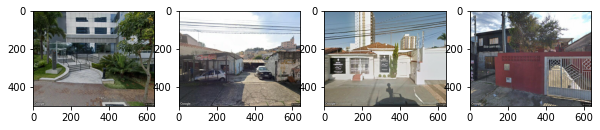

In [7]:
fig = plt.figure(figsize=(10,5))

print("Imagens de empresas:")
for i in range(4):
    # Imagens de empresas:
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(train_path_emp,arrImagEmp[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

Imagens de não empresas:


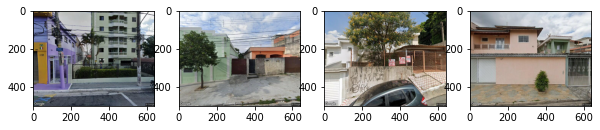

In [8]:
fig = plt.figure(figsize=(10,5))

print("Imagens de não empresas:")
for i in range(4):
    # Imagens de não empresas:
    z = i + 4
    plt.subplot(240 + 1 + z)
    img = plt.imread(os.path.join(train_path_Nemp,arrImagNEmp[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

### Gerando dados de treino, validação e test.

In [9]:
import tensorflow as tf
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras.preprocessing.image import ImageDataGenerator

#Definindo funções úteis para fazer os plots das imagens:
def plotImages(imgList, n_row=1, n_col=1):
    _, axs = plt.subplots(n_row, n_col, figsize=(25,5))
    axs = axs.flatten()
    for img, ax in zip(imgList, axs):
        ax.imshow(np.uint8(img), interpolation='nearest')
    plt.show()

#### Dados com aumentação.

##### Dados sem pré-processamento.

In [10]:
# Dados de treino e validação com aumentação:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator = train_datagen.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_train, batch_Y_train = train_generator.next()


# Calcula os pesos:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator.labels), y=train_generator.labels)
train_class_weights = dict(enumerate(class_weights))
print('train_class_weights: ', train_class_weights)

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
train_class_weights:  {0: 1.2175529936779472, 1: 0.8484063228815756}


##### Dados com pré-processamento para resnet50.

In [11]:
# Dados de treino e validação com aumentação:
train_datagen_resnet = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator_resnet = train_datagen_resnet.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator_resnet = train_datagen_resnet.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_train_resnet, batch_Y_train_resnet = train_generator_resnet.next()

print(batch_X_train_resnet.shape, batch_Y_train_resnet.shape)

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
(32, 224, 224, 3) (32, 2)


Imagens sem aumentações + pré-processamento resnet


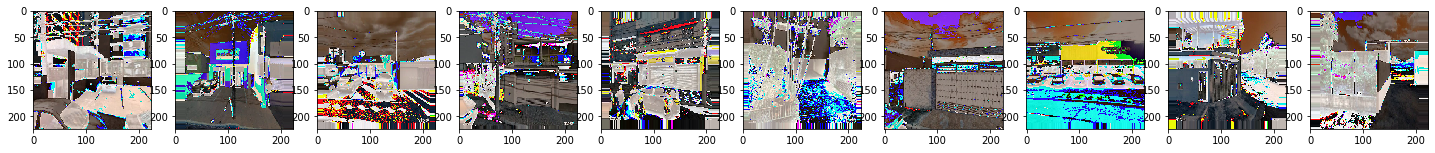

(None, None)

In [12]:
#print("Imagens sem aumentações"), plotImages(batch_X_sa[:10], 1, 10)
print("Imagens sem aumentações + pré-processamento resnet"), plotImages(batch_X_train_resnet[:10], 1, 10)

## Modelo Baseline com ResNet50

####Gerando o modelo.

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Congela camadas pré-treinadas
for layer in model.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
modelB = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

modelB.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 24,145,410
Trainable params: 557,698
Non-trainable params: 23,587,712
______________________________________

####Define optmizer Adam com exponential decay.

In [ ]:
# Instancia um otimizador.
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

opt = keras.optimizers.Adam(learning_rate=lr_schedule)

####Treinando e avaliando o modelo usando dados com aumentação.

In [ ]:
# Compila e treina o modelo completo.
modelB.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',tf.keras.metrics.AUC()])

history_modelB = modelB.fit(train_generator_resnet, epochs=25,
                  validation_data=validation_generator_resnet, class_weight=train_class_weights)

Epoch 1/25
205/205 [==============================] - 243s 1s/step - loss: 0.7339 - accuracy: 0.7783 - auc: 0.8429 - val_loss: 0.3877 - val_accuracy: 0.8373 - val_auc: 0.9133
Epoch 2/25
205/205 [==============================] - 250s 1s/step - loss: 0.3991 - accuracy: 0.8264 - auc: 0.9041 - val_loss: 0.4500 - val_accuracy: 0.8055 - val_auc: 0.8742
Epoch 3/25
205/205 [==============================] - 266s 1s/step - loss: 0.3770 - accuracy: 0.8404 - auc: 0.9145 - val_loss: 0.3511 - val_accuracy: 0.8573 - val_auc: 0.9269
Epoch 4/25
205/205 [==============================] - 271s 1s/step - loss: 0.3536 - accuracy: 0.8508 - auc: 0.9247 - val_loss: 0.3887 - val_accuracy: 0.8468 - val_auc: 0.9075
Epoch 5/25
205/205 [==============================] - 269s 1s/step - loss: 0.3506 - accuracy: 0.8505 - auc: 0.9258 - val_loss: 0.4270 - val_accuracy: 0.8191 - val_auc: 0.8981
Epoch 6/25
205/205 [==============================] - 256s 1s/step - loss: 0.3410 - accuracy: 0.8568 - auc: 0.9301 - val_loss

In [ ]:
history_modelB.history['val_accuracy']

[0.8372727036476135,
 0.8054545521736145,
 0.857272744178772,
 0.846818208694458,
 0.8190909028053284,
 0.8477272987365723,
 0.8545454740524292,
 0.8531818389892578,
 0.8463636636734009,
 0.8563636541366577,
 0.8277272582054138,
 0.846818208694458,
 0.8381817936897278,
 0.8513636589050293,
 0.8618181943893433,
 0.8513636589050293,
 0.8163636326789856,
 0.8595454692840576,
 0.857272744178772,
 0.8540909290313721,
 0.8263636231422424,
 0.8531818389892578,
 0.8445454835891724,
 0.850454568862915,
 0.8513636589050293]

####Salva e importa modelo baseline.

In [ ]:
# Salvando o modelo

import h5py
# save model and architecture to single file
modelB.save("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB_2camadas_23.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [ ]:
#Carrega pesos salvos.
# from keras.models import load_model
# modelB = load_model("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB_2camadas_23.h5")
# print("Loaded model from disk")

Loaded model from disk


####Acurácia balanceada com dados com aumentação.

In [ ]:
#Reseta o gerador para gerar os dados usados no nosso predict.
validation_generator_resnet.reset()

In [ ]:
#Faz a predição à partir dos dados do nosso gerador utilizando o modelo baseline.
y_pred = modelB.predict(validation_generator_resnet)

In [ ]:
# Converte os valores preditos para números inteiros nos valores de 0 ou 1.
y_pred_int = (y_pred > 0.5).astype(np.int32)

In [ ]:
# A lista acima é formada por listas de tamanho 2 onde nos interessa apenas o segundo item de cada lista, portanto o que fazemos nesse trecho é gerar 
# uma nova lista de inteiros selecionando apenas o 2º item de cada lista presente no y_pred_nn.
y_pred_nn = []
for item in y_pred_int:
    y_pred_nn.append(item[1])

In [ ]:
# Novamente faz o reset do gerador para puxarmos os dados do target.
validation_generator_resnet.reset()

In [ ]:
# Gera uma lista com os rótulos de cada imagem.
Y_resnet_val = []

while True:
    x,y = validation_generator_resnet.next()
    
    new_list = []
    for item in y:
        new_list.append(item)
        
    Y_resnet_val += new_list
    if len(Y_resnet_val) > 2200:
        break

In [ ]:
# Acurácia balanceada.
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(validation_generator_resnet.labels, y_pred_nn, sample_weight=None, adjusted=False)

0.8303180434232424

####Resultados do modelo baseline usando dados com aumentação.

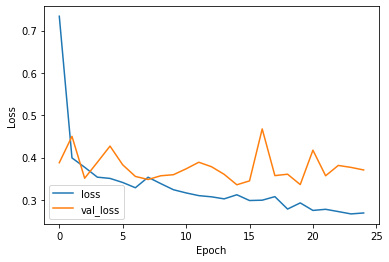

In [ ]:
plt.plot(history_modelB.history['loss'], label='loss')
plt.plot(history_modelB.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

#test_loss, test_acc = modelB.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

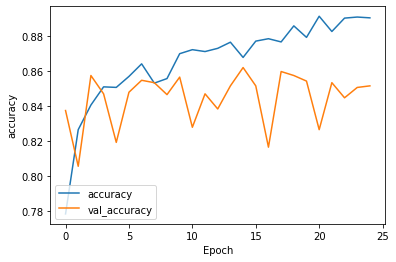

In [ ]:
plt.plot(history_modelB.history['accuracy'], label='accuracy')
plt.plot(history_modelB.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower left')

#test_loss, test_acc = frozen_model.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

In [ ]:
# Matriz de confusão.
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(validation_generator_resnet.classes, y_pred_nn)



Acurácia balanceada: 0.8303180434232424


Matriz de confusão balanceada


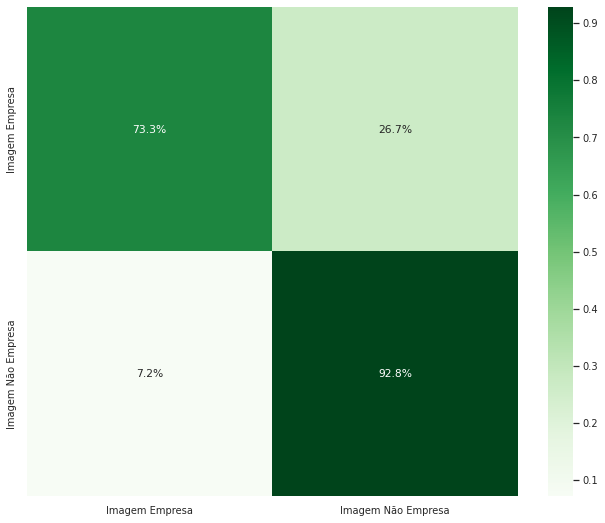

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Imagem Empresa', 'Imagem Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", balanced_acc)

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap = 'Greens')

####AUC ROC

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(validation_generator.classes, y_pred[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(validation_generator.classes, y_pred[:,1])
print(auc_score)

0.9224060283642617


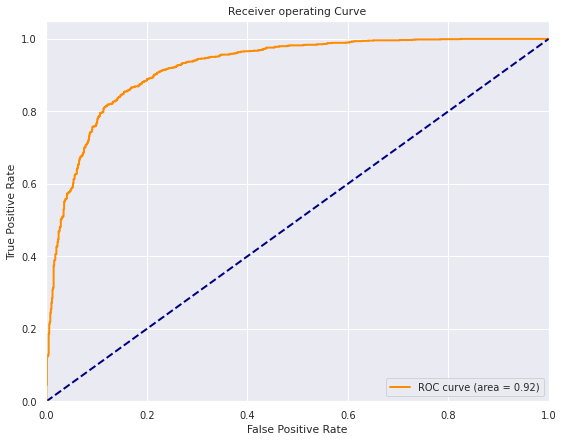

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()

### Fine-tuning.

In [ ]:
# Descongelando as camadas e retreinando o modelo.
modelB.trainable = True
modelB.summary()

modelB.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.AUC()]
)

history_modelB = modelB.fit(train_generator_resnet, epochs=15, validation_data=validation_generator_resnet,)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 24,145,410
Trainable params: 24,092,290
Non-trainable params: 53,120
_______________________________________

####Salva e importa modelo baseline.

In [ ]:
# Salvando o modelo

import h5py
# save model and architecture to single file
modelB.save("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB_2camadas_23.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [13]:
#Carrega pesos salvos.
from keras.models import load_model
modelB = load_model("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB_2camadas_23.h5")
print("Loaded model from disk")

Loaded model from disk


###Resultados do modelo baseline com fine-tuning.

####Acurácia balanceada com dados com aumentação.

In [15]:
#Reseta o gerador para gerar os dados usados no nosso predict.
validation_generator_resnet.reset()

In [16]:
#Faz a predição à partir dos dados do nosso gerador utilizando o modelo baseline.
y_pred = modelB.predict(validation_generator_resnet)

In [17]:
# Converte os valores preditos para números inteiros nos valores de 0 ou 1.
y_pred_int = (y_pred > 0.5).astype(np.int32)

In [18]:
# A lista acima é formada por listas de tamanho 2 onde nos interessa apenas o segundo item de cada lista, portanto o que fazemos nesse trecho é gerar 
# uma nova lista de inteiros selecionando apenas o 2º item de cada lista presente no y_pred_nn.
y_pred_nn = []
for item in y_pred_int:
    y_pred_nn.append(item[1])

In [19]:
# Novamente faz o reset do gerador para puxarmos os dados do target.
validation_generator_resnet.reset()

In [20]:
# Gera uma lista com os rótulos de cada imagem.
Y_resnet_val = []

while True:
    x,y = validation_generator_resnet.next()
    
    new_list = []
    for item in y:
        new_list.append(item)
        
    Y_resnet_val += new_list
    if len(Y_resnet_val) > 2200:
        break

In [21]:
# Acurácia balanceada.
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(validation_generator_resnet.labels, y_pred_nn, sample_weight=None, adjusted=False)

0.8605199404526045

####Gráficos.

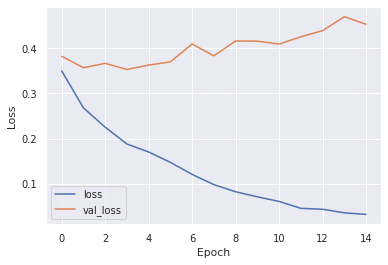

In [ ]:
plt.plot(history_modelB.history['loss'], label='loss')
plt.plot(history_modelB.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

#test_loss, test_acc = modelB.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

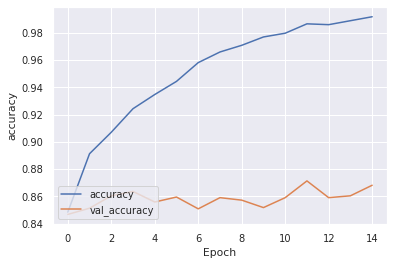

In [ ]:
plt.plot(history_modelB.history['accuracy'], label='accuracy')
plt.plot(history_modelB.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower left')

#test_loss, test_acc = frozen_model.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

####Matriz confusão.

In [22]:
# Matriz de confusão.
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(validation_generator_resnet.classes, y_pred_nn)



Acurácia balanceada: 0.8605199404526045


Matriz de confusão balanceada


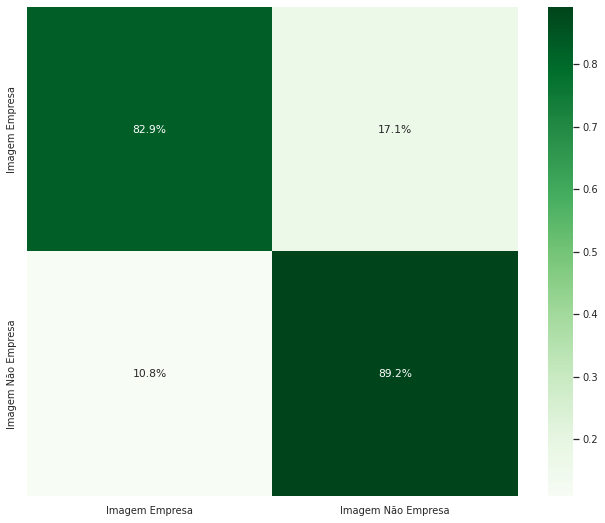

In [23]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Imagem Empresa', 'Imagem Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", balanced_acc)

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap = 'Greens')

####AUC ROC

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(validation_generator.classes, y_pred[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(validation_generator.classes, y_pred[:,1])
print(auc_score)

0.9338417187962019


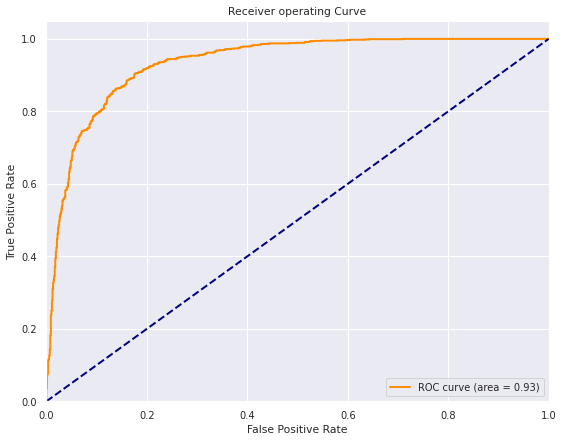

In [25]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()